In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print("Modules are imported")
import pandas as pd


Modules are imported


## Import Dataset
### MNIST File

In [28]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [29]:
#Shape of the dataset
print("x_train.shape ->" , x_train.shape)
print("y_train.shape ->" , y_train.shape)
print("x_test.shape ->" , x_test.shape)
print("y_test.shape ->" , y_test.shape)

x_train.shape -> (60000, 28, 28)
y_train.shape -> (60000,)
x_test.shape -> (10000, 28, 28)
y_test.shape -> (10000,)


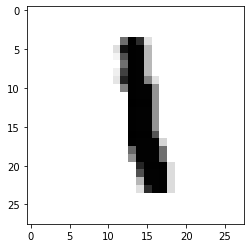

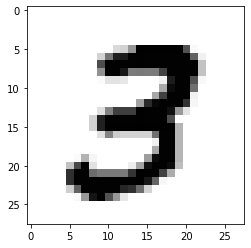

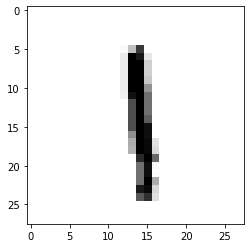

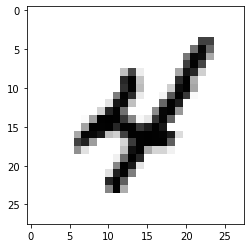

In [30]:
#Plot an image example
for i in range(6,10):
    plt.imshow(x_train[i], cmap = 'binary')
    plt.show()

In [31]:
#Display Labels
print(y_train[0])
print(set(y_train))

5
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [32]:
#One Hot Encoding

In [33]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
print('y_test_encoded.shape ->', y_test_encoded.shape)
print('y_train_encoded.shape ->', y_train_encoded.shape)

y_test_encoded.shape -> (10000, 10)
y_train_encoded.shape -> (60000, 10)


In [34]:
print(y_train_encoded[0] ,"-", y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] - 5


## Preprocessing the examples


In [35]:
#convert N-dimensional arrays to vector
x_train_reshaped = np.reshape(x_train ,(60000 , 784))
x_test_reshaped = np.reshape(x_test ,(10000 , 784))
print('x_train_reshaped :', x_train_reshaped.shape)
print('x_test_reshaped :', x_test_reshaped.shape)


x_train_reshaped : (60000, 784)
x_test_reshaped : (10000, 784)


### Display Pixel Values


In [36]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [37]:
#Normalise the pixel values
def normalise(val):
    mean = x_train_reshaped.mean()
    std = x_train_reshaped.std()
    #a very small value
    epsilon = 1e-10
    return (val - mean) / (std + epsilon)

#Normalisation of x_train_reshaped & x_test_reshaped
x_train_norm = normalise(x_train_reshaped)
x_test_norm = normalise(x_test_reshaped)

## Creation of the model


In [38]:
model = Sequential([ 
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])

## Compilation of the model


In [39]:
model.compile(
    optimizer="sgd",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## <span style='color:black'>Training the model</span>


In [41]:
model.fit(x_train_norm, y_train_encoded, epochs =3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0470 - accuracy: 0.9869
Epoch 2/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0419 - accuracy: 0.9889
Epoch 3/3
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0379 - accuracy: 0.9904


## Evaluation

In [46]:
_, accuracy = model.evaluate(x_test_norm, y_test_encoded, verbose=0)
accuracy * 100 


97.50000238418579

## Predictions

In [80]:
pred = model.predict(x_test_norm)
pred.shape

(10000, 10)

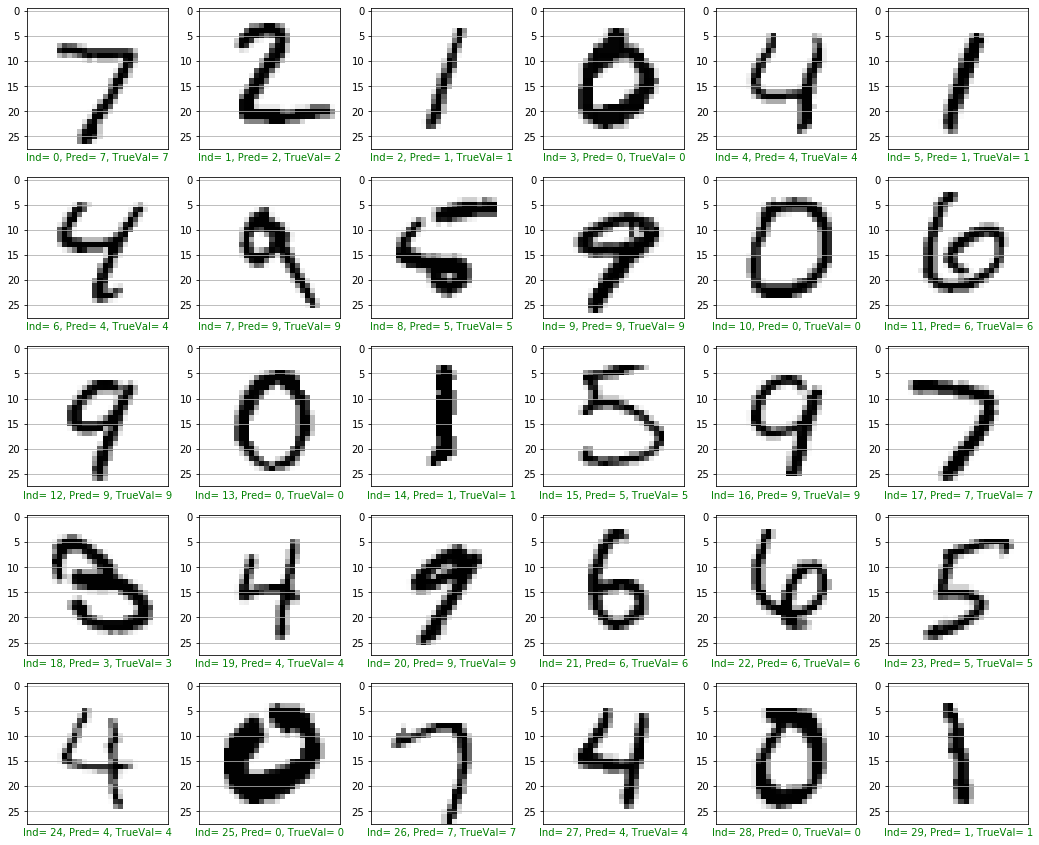

In [81]:
plt.figure(figsize = (18 ,15))
start_index = 0
for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.grid(True)
    plt.xticks([])
    
    #returns index of the highest probability of x_test_norm
    preds = np.argmax(pred[start_index + i])
    true_val = y_test[start_index + i]
    col = 'green'
    if preds != true_val:
        col = "red"
    
    plt.xlabel("Ind= {}, Pred= {}, TrueVal= {}".format(start_index + i, preds, true_val), color = col)
    plt.imshow(x_test[start_index + i], cmap = "binary")
    
plt.show()
    


In [213]:
pred_list = []
true_val_list = []
index_list = []
for i in range(10000):
    preds = np.argmax(pred[start_index + i])
    true_val = y_test[i]
    if preds - true_val != 0:
        pred_list.append(preds)
        true_val_list.append(true_val)
        index_list.append(i)
data = pd.DataFrame({'Index': index_list, 'Prediction': pred_list, 'True Value' : true_val_list})
data.head(7)

,Index,Prediction,True Value
0,104,5,9
1,149,4,2
2,247,6,4
3,259,0,6
4,273,3,9
5,274,3,9
6,321,7,2


## Number of error while prediction

In [198]:
data.count()

Index         250
Prediction    250
True Value    250
dtype: int64

In [211]:
error = data.count()["Index"]
error_rate = error / x_train.shape[0] * 100
print(error_rate, '%' , sep ='')


0.4166666666666667%
